In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kruskal, mannwhitneyu
import seaborn as sns




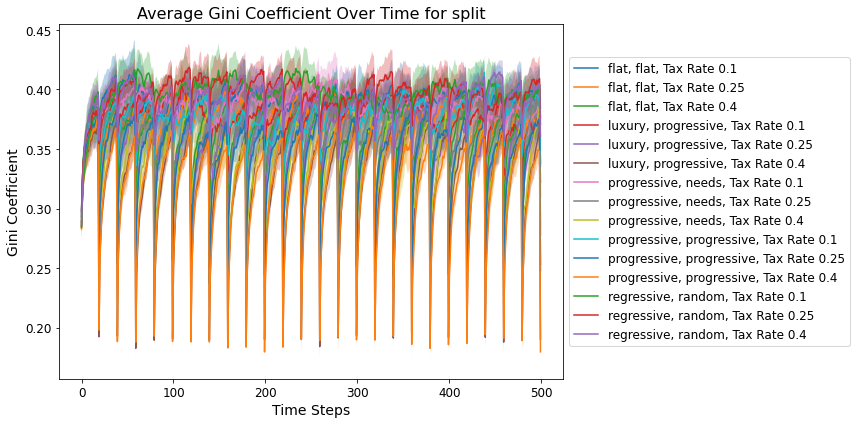

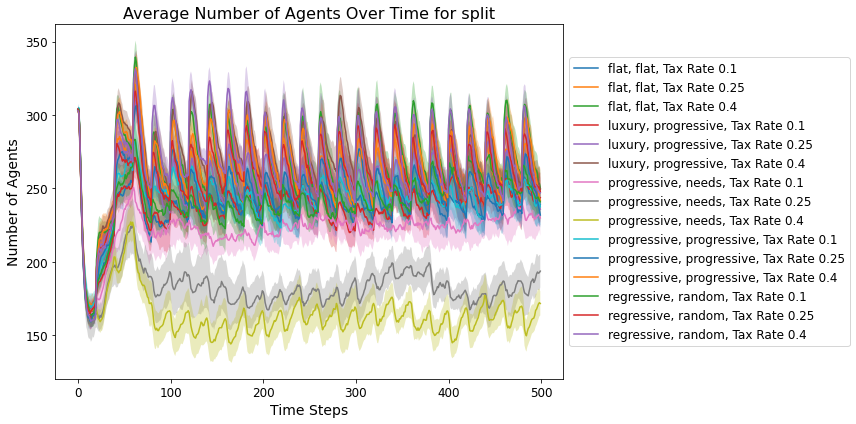

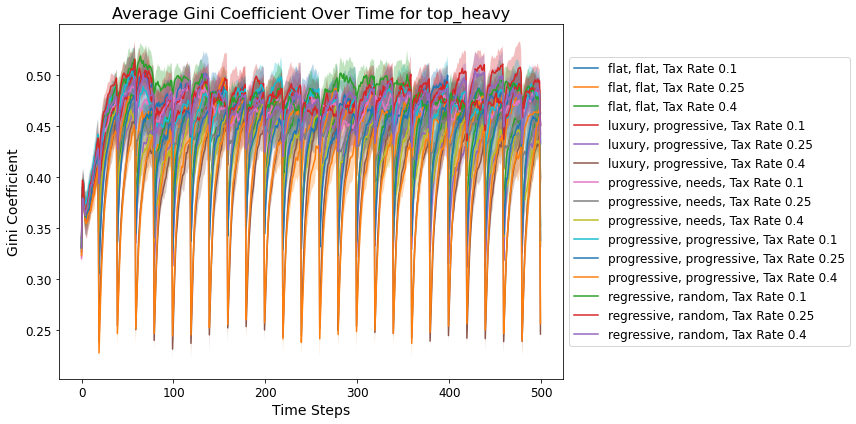

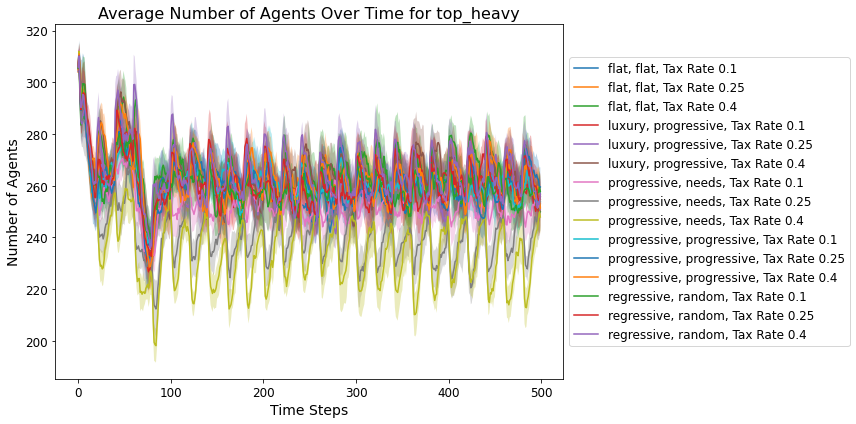

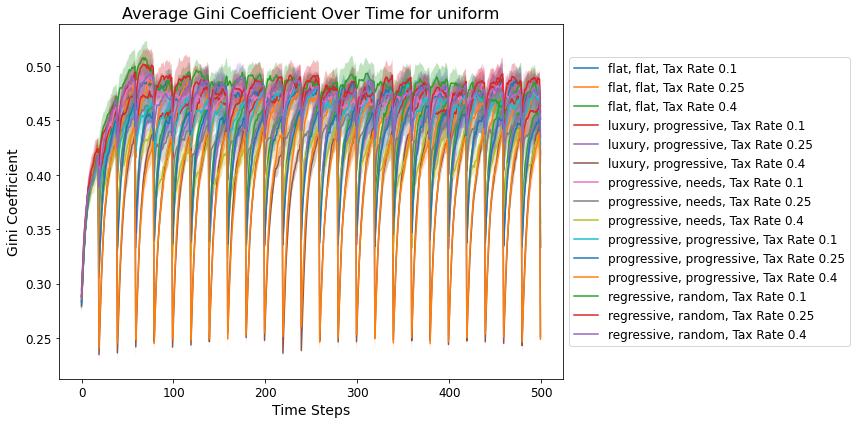

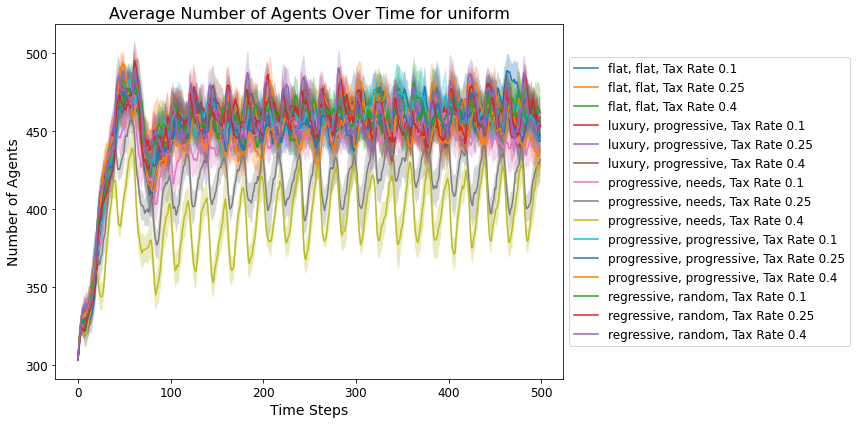

In [3]:
def load_and_process(file_path):
    """Load CSV file and process the data."""
    data = pd.read_csv(file_path)
    
    def convert_str_to_list(list_str):
        list_str = list_str.strip('[]')
        list_str = list_str.split(',')
        return [float(x.strip()) for x in list_str]

    # Apply the conversion to the relevant columns
    data['Time Steps'] = data['Time Steps'].apply(convert_str_to_list)
    data['Gini Over Time'] = data['Gini Over Time'].apply(convert_str_to_list)
    data['Agents Over Time'] = data['Agents Over Time'].apply(convert_str_to_list)
    
    return data

def plot_results(data, title, metric, y_label, filename):
    """Plot the average and 95% CI of the metric over time and save the plot as an image."""
    fig, ax = plt.subplots(figsize=(12, 6))
    fig.patch.set_facecolor('white')
    ax.set_facecolor('white')

    for (tax_scheme, distributer_scheme, tax_rate), group_data in data.groupby(['Tax Scheme', 'Distributer Scheme', 'Tax Rate']):
        time_steps = group_data.iloc[0]['Time Steps']
        values = np.array(group_data[metric].tolist())
        mean_values = np.mean(values, axis=0)
        std_error = np.std(values, axis=0) / np.sqrt(values.shape[0])
        ci95 = 1.96 * std_error

        label = f"{tax_scheme}, {distributer_scheme}, Tax Rate {tax_rate}"
        ax.plot(time_steps, mean_values, label=label)
        ax.fill_between(time_steps, mean_values - ci95, mean_values + ci95, alpha=0.3)

    ax.set_xlabel('Time Steps', fontsize=14)
    ax.set_ylabel(y_label, fontsize=14)
    ax.set_title(f'Average {y_label} Over Time for {title}', fontsize=16)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
    plt.tight_layout()
    plt.savefig(f'plots/{filename}', bbox_inches='tight')
    plt.show()

# Load data from the three files
file_paths = [
    'Experimental Results/experiments_results_v4_split.csv',
    'Experimental Results/experiments_results_v4_top_heavy.csv',
    'Experimental Results/experiments_results_v4_uniform.csv'
]

titles = ['split', 'top_heavy', 'uniform']
all_data = [load_and_process(file_path) for file_path in file_paths]

# Plot results for each file and save the plots
for data, title in zip(all_data, titles):
    plot_results(data, title, 'Gini Over Time', 'Gini Coefficient', f'{title}_gini_over_time.png')
    plot_results(data, title, 'Agents Over Time', 'Number of Agents', f'{title}_agents_over_time.png')


Kruskal-Wallis Test for split: H-statistic=132.633642384106, p-value=2.0505694346916358e-21
Significant Comparisons for split:
                       combination_1                combination_2  \
0                  (flat, flat, 0.1)           (flat, flat, 0.25)   
1                  (flat, flat, 0.1)            (flat, flat, 0.4)   
2                  (flat, flat, 0.1)   (luxury, progressive, 0.1)   
3                  (flat, flat, 0.1)  (luxury, progressive, 0.25)   
4                  (flat, flat, 0.1)   (luxury, progressive, 0.4)   
..                               ...                          ...   
81  (progressive, progressive, 0.25)   (regressive, random, 0.25)   
82  (progressive, progressive, 0.25)    (regressive, random, 0.4)   
83   (progressive, progressive, 0.4)    (regressive, random, 0.1)   
84   (progressive, progressive, 0.4)   (regressive, random, 0.25)   
85   (progressive, progressive, 0.4)    (regressive, random, 0.4)   

    u_statistic   p_value  
0         100.0 

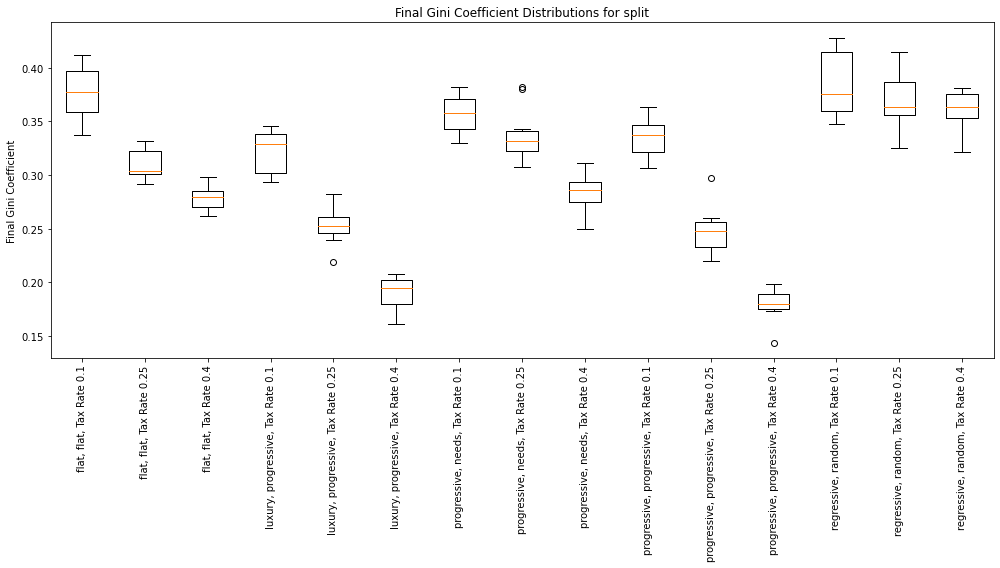

Best combination for split:
mean_gini    0.179706
std_gini     0.015466
Name: (progressive, progressive, 0.4), dtype: float64
Kruskal-Wallis Test for top_heavy: H-statistic=120.92736423841052, p-value=4.141285497431129e-19
Significant Comparisons for top_heavy:
                      combination_1                combination_2  u_statistic  \
0                 (flat, flat, 0.1)           (flat, flat, 0.25)         89.0   
1                 (flat, flat, 0.1)            (flat, flat, 0.4)        100.0   
2                 (flat, flat, 0.1)  (luxury, progressive, 0.25)        100.0   
3                 (flat, flat, 0.1)   (luxury, progressive, 0.4)        100.0   
4                 (flat, flat, 0.1)   (progressive, needs, 0.25)         82.0   
..                              ...                          ...          ...   
70  (progressive, progressive, 0.4)    (regressive, random, 0.1)          0.0   
71  (progressive, progressive, 0.4)   (regressive, random, 0.25)          0.0   
72  (prog

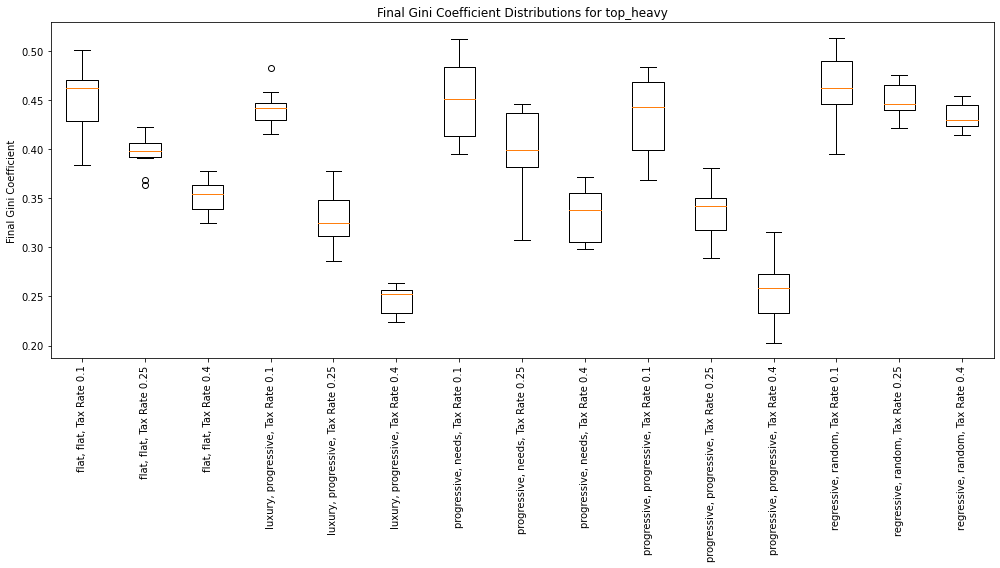

Best combination for top_heavy:
mean_gini    0.245973
std_gini     0.015234
Name: (luxury, progressive, 0.4), dtype: float64
Kruskal-Wallis Test for uniform: H-statistic=132.53562913907285, p-value=2.144185318441882e-21
Significant Comparisons for uniform:
                      combination_1                combination_2  u_statistic  \
0                 (flat, flat, 0.1)           (flat, flat, 0.25)         91.0   
1                 (flat, flat, 0.1)            (flat, flat, 0.4)        100.0   
2                 (flat, flat, 0.1)   (luxury, progressive, 0.1)         81.0   
3                 (flat, flat, 0.1)  (luxury, progressive, 0.25)        100.0   
4                 (flat, flat, 0.1)   (luxury, progressive, 0.4)        100.0   
..                              ...                          ...          ...   
83  (progressive, progressive, 0.4)   (regressive, random, 0.25)          0.0   
84  (progressive, progressive, 0.4)    (regressive, random, 0.4)          0.0   
85        (reg

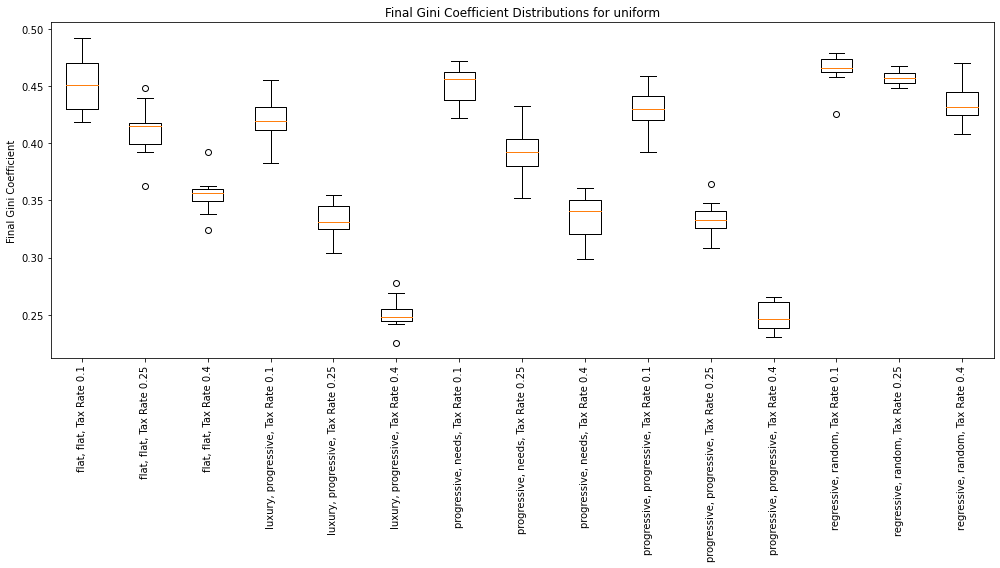

Best combination for uniform:
mean_gini    0.248830
std_gini     0.012752
Name: (progressive, progressive, 0.4), dtype: float64


In [4]:
def load_and_process(file_path):
    """Load CSV file and process the data."""
    data = pd.read_csv(file_path)
    
    def convert_str_to_list(list_str):
        list_str = list_str.strip('[]')
        list_str = list_str.split(',')
        return [float(x.strip()) for x in list_str]

    # Apply the conversion to the relevant columns
    data['Gini Over Time'] = data['Gini Over Time'].apply(convert_str_to_list)
    
    return data

def summarize_significant_results(results):
    """Summarize significant comparisons with p-values."""
    significant_results = [res for res in results if res['p_value'] < 0.05]
    summary = pd.DataFrame(significant_results)
    return summary

def visualize_gini_distributions(data, title):
    """Visualize Gini coefficient distributions using box plots."""
    fig, ax = plt.subplots(figsize=(14, 8))
    data_to_plot = []
    labels = []

    for (tax_scheme, distributer_scheme, tax_rate), group_data in data.groupby(['Tax Scheme', 'Distributer Scheme', 'Tax Rate']):
        final_gini = [gini[-1] for gini in group_data['Gini Over Time']]
        data_to_plot.append(final_gini)
        labels.append(f"{tax_scheme}, {distributer_scheme}, Tax Rate {tax_rate}")

    ax.boxplot(data_to_plot)
    ax.set_xticklabels(labels, rotation=90)
    ax.set_ylabel('Final Gini Coefficient')
    ax.set_title(f'Final Gini Coefficient Distributions for {title}')
    plt.tight_layout()
    plt.show()

def identify_best_combination(data, title):
    """Identify the best combination for reducing Gini coefficient."""
    summary = data.groupby(['Tax Scheme', 'Distributer Scheme', 'Tax Rate']).agg(
        mean_gini=('Final Gini', 'mean'),
        std_gini=('Final Gini', 'std')
    ).sort_values(by='mean_gini')
    
    best_combination = summary.iloc[0]
    print(f"Best combination for {title}:")
    print(best_combination)

# Load data from the three files
file_paths = [
    'Experimental Results/experiments_results_v4_split.csv',
    'Experimental Results/experiments_results_v4_top_heavy.csv',
    'Experimental Results/experiments_results_v4_uniform.csv'
]


titles = ['split', 'top_heavy', 'uniform']
all_data = [load_and_process(file_path) for file_path in file_paths]

# Perform analysis for each map
for data, title in zip(all_data, titles):
    # Get the final Gini coefficient for each run
    data['Final Gini'] = data['Gini Over Time'].apply(lambda x: x[-1])
    
    # Perform Kruskal-Wallis test
    group_data = [group['Final Gini'].values for name, group in data.groupby(['Tax Scheme', 'Distributer Scheme', 'Tax Rate'])]
    kruskal_result = kruskal(*group_data)
    print(f"Kruskal-Wallis Test for {title}: H-statistic={kruskal_result.statistic}, p-value={kruskal_result.pvalue}")
    
    # If significant, perform pairwise comparisons
    results = []
    if kruskal_result.pvalue < 0.05:
        combinations = data.groupby(['Tax Scheme', 'Distributer Scheme', 'Tax Rate']).groups.keys()
        combinations = list(combinations)
        for i in range(len(combinations)):
            for j in range(i+1, len(combinations)):
                group1 = data[(data['Tax Scheme'] == combinations[i][0]) & 
                              (data['Distributer Scheme'] == combinations[i][1]) & 
                              (data['Tax Rate'] == combinations[i][2])]['Final Gini'].values
                group2 = data[(data['Tax Scheme'] == combinations[j][0]) & 
                              (data['Distributer Scheme'] == combinations[j][1]) & 
                              (data['Tax Rate'] == combinations[j][2])]['Final Gini'].values
                u_statistic, p_value = mannwhitneyu(group1, group2)
                results.append({
                    'combination_1': combinations[i],
                    'combination_2': combinations[j],
                    'u_statistic': u_statistic,
                    'p_value': p_value
                })

    # Summarize significant results
    summary = summarize_significant_results(results)
    print(f"Significant Comparisons for {title}:")
    print(summary)
    
    # Visualize Gini coefficient distributions
    visualize_gini_distributions(data, title)
    
    # Identify the best combination for reducing Gini coefficient
    identify_best_combination(data, title)


Kruskal-Wallis Test for split: H-statistic=132.633642384106, p-value=2.0505694346916358e-21
Significant Comparisons for split:
                       combination_1                combination_2  \
0                  (flat, flat, 0.1)           (flat, flat, 0.25)   
1                  (flat, flat, 0.1)            (flat, flat, 0.4)   
2                  (flat, flat, 0.1)   (luxury, progressive, 0.1)   
3                  (flat, flat, 0.1)  (luxury, progressive, 0.25)   
4                  (flat, flat, 0.1)   (luxury, progressive, 0.4)   
..                               ...                          ...   
81  (progressive, progressive, 0.25)   (regressive, random, 0.25)   
82  (progressive, progressive, 0.25)    (regressive, random, 0.4)   
83   (progressive, progressive, 0.4)    (regressive, random, 0.1)   
84   (progressive, progressive, 0.4)   (regressive, random, 0.25)   
85   (progressive, progressive, 0.4)    (regressive, random, 0.4)   

    u_statistic   p_value  
0         100.0 

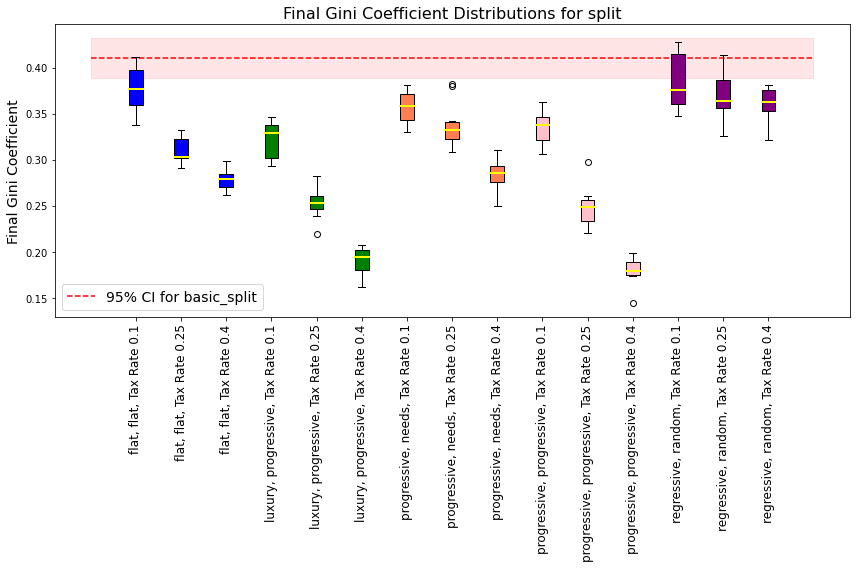

Best combination for split:
mean_gini    0.179706
std_gini     0.015466
Name: (progressive, progressive, 0.4), dtype: float64
Kruskal-Wallis Test for top_heavy: H-statistic=120.92736423841052, p-value=4.141285497431129e-19
Significant Comparisons for top_heavy:
                      combination_1                combination_2  u_statistic  \
0                 (flat, flat, 0.1)           (flat, flat, 0.25)         89.0   
1                 (flat, flat, 0.1)            (flat, flat, 0.4)        100.0   
2                 (flat, flat, 0.1)  (luxury, progressive, 0.25)        100.0   
3                 (flat, flat, 0.1)   (luxury, progressive, 0.4)        100.0   
4                 (flat, flat, 0.1)   (progressive, needs, 0.25)         82.0   
..                              ...                          ...          ...   
70  (progressive, progressive, 0.4)    (regressive, random, 0.1)          0.0   
71  (progressive, progressive, 0.4)   (regressive, random, 0.25)          0.0   
72  (prog

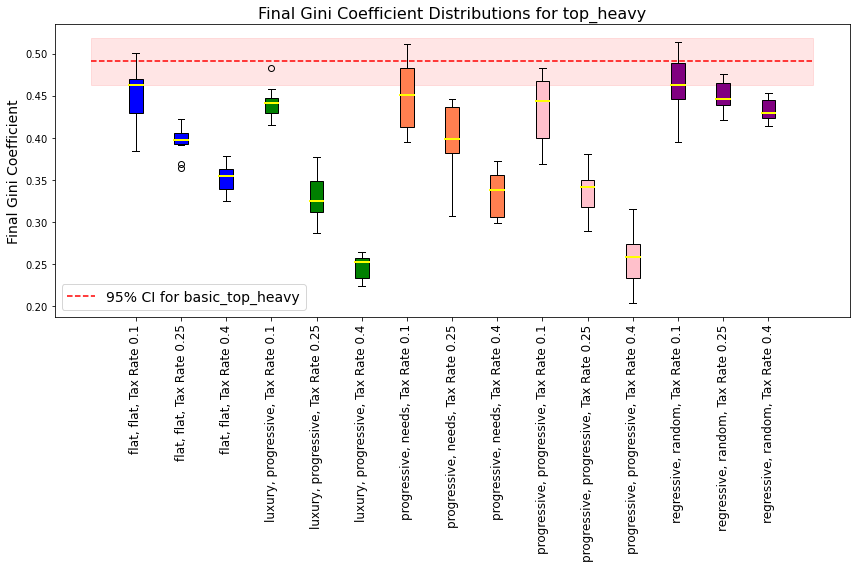

Best combination for top_heavy:
mean_gini    0.245973
std_gini     0.015234
Name: (luxury, progressive, 0.4), dtype: float64
Kruskal-Wallis Test for uniform: H-statistic=132.53562913907285, p-value=2.144185318441882e-21
Significant Comparisons for uniform:
                      combination_1                combination_2  u_statistic  \
0                 (flat, flat, 0.1)           (flat, flat, 0.25)         91.0   
1                 (flat, flat, 0.1)            (flat, flat, 0.4)        100.0   
2                 (flat, flat, 0.1)   (luxury, progressive, 0.1)         81.0   
3                 (flat, flat, 0.1)  (luxury, progressive, 0.25)        100.0   
4                 (flat, flat, 0.1)   (luxury, progressive, 0.4)        100.0   
..                              ...                          ...          ...   
83  (progressive, progressive, 0.4)   (regressive, random, 0.25)          0.0   
84  (progressive, progressive, 0.4)    (regressive, random, 0.4)          0.0   
85        (reg

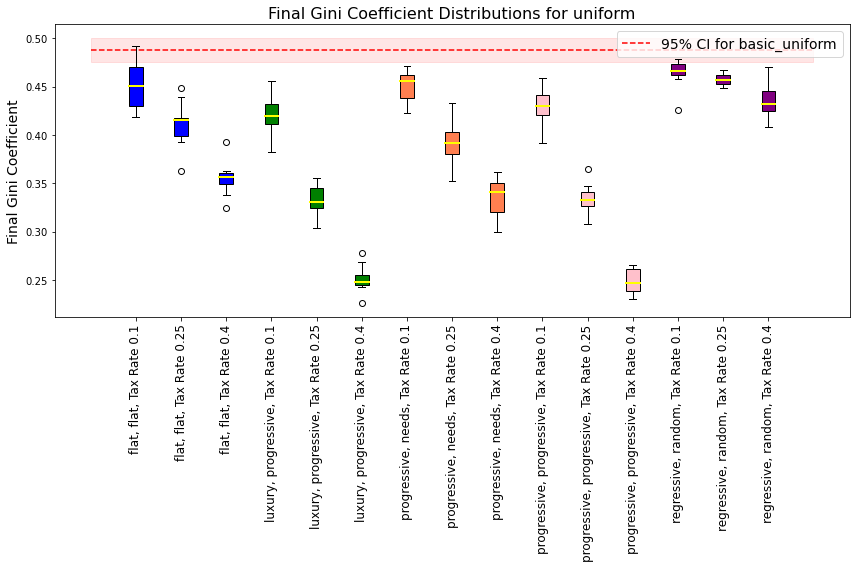

Best combination for uniform:
mean_gini    0.248830
std_gini     0.012752
Name: (progressive, progressive, 0.4), dtype: float64


In [23]:
import logging
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kruskal, mannwhitneyu
from tqdm import tqdm
from multiprocessing import Pool, cpu_count
from src.SugarScape import SugarScape

def setup_logger():
    """Set up a logger for simulation."""
    logger = logging.getLogger("simulation")
    handler = logging.FileHandler("simulation.log")
    formatter = logging.Formatter('%(asctime)s - %(levellevelname)s - %(message)s')
    handler.setFormatter(formatter)
    logger.addHandler(handler)
    logger.setLevel(logging.INFO)
    return logger

def load_and_process(file_path):
    """Load CSV file and process the data."""
    data = pd.read_csv(file_path)
    
    def convert_str_to_list(list_str):
        list_str = list_str.strip('[]')
        list_str = list_str.split(',')
        return [float(x.strip()) for x in list_str]

    # Apply the conversion to the relevant columns
    data['Gini Over Time'] = data['Gini Over Time'].apply(convert_str_to_list)
    
    return data

def calculate_ci(data, confidence=0.95):
    """Calculate the 95% confidence interval for the final Gini coefficient."""
    n = len(data)
    mean = np.mean(data)
    sem = np.std(data) / np.sqrt(n)
    h = sem * 1.96  # 95% confidence interval
    return mean - h, mean + h

def summarize_significant_results(results):
    """Summarize significant comparisons with p-values."""
    significant_results = [res for res in results if res['p_value'] < 0.05]
    summary = pd.DataFrame(significant_results)
    return summary

def visualize_gini_distributions(data, title, ci):
    """Visualize Gini coefficient distributions using box plots and add CI lines."""
    fig, ax = plt.subplots(figsize=(12, 8))
    data_to_plot = []
    labels = []
    colors = ['blue', 'green', 'coral', 'pink', 'purple']  # Define colors for the groups

    for i, ((tax_scheme, distributer_scheme, tax_rate), group_data) in enumerate(data.groupby(['Tax Scheme', 'Distributer Scheme', 'Tax Rate'])):
        final_gini = [gini[-1] for gini in group_data['Gini Over Time']]
        data_to_plot.append(final_gini)
        labels.append(f"{tax_scheme}, {distributer_scheme}, Tax Rate {tax_rate}")

    boxprops = dict(color='blue')
    whiskerprops = dict(color='blue')
    capprops = dict(color='blue')
    medianprops = dict(color='yellow', linewidth=2)  # Change the median line to yellow and make it thicker
    
    for i in range(0, len(data_to_plot), 3):
        ax.boxplot(data_to_plot[i:i+3], positions=range(i+1, i+4), patch_artist=True, 
                   boxprops=dict(facecolor=colors[i//3 % len(colors)]),
                   medianprops=medianprops)  # Apply the yellow color for the median line
    
    ax.set_xticklabels(labels, rotation=90, fontsize=12)
    ax.set_ylabel('Final Gini Coefficient', fontsize=14)
    ax.set_title(f'Final Gini Coefficient Distributions for {title}', fontsize=16)
    
    # Add CI lines
    ax.hlines(y=ci['mean'], xmin=0, xmax=len(labels)+1, colors='red', linestyles='dashed', label=f"95% CI for {ci['model']}")
    ax.fill_between(x=np.arange(0, len(labels)+2), y1=ci['ci_lower'], y2=ci['ci_upper'], color='red', alpha=0.1)
    
    plt.legend(fontsize=14)
    plt.tight_layout()
    plt.show()

def identify_best_combination(data, title):
    """Identify the best combination for reducing Gini coefficient."""
    summary = data.groupby(['Tax Scheme', 'Distributer Scheme', 'Tax Rate']).agg(
        mean_gini=('Final Gini', 'mean'),
        std_gini=('Final Gini', 'std')
    ).sort_values(by='mean_gini')
    
    best_combination = summary.iloc[0]
    print(f"Best combination for {title}:")
    print(best_combination)

# Load data from the three files
file_paths = [
    'Experimental Results/experiments_results_v4_split.csv',
    'Experimental Results/experiments_results_v4_top_heavy.csv',
    'Experimental Results/experiments_results_v4_uniform.csv'
]

basic_model_paths = [
    'experiments_results_basic_split.csv',
    'experiments_results_basic_top_heavy.csv',
    'experiments_results_basic_uniform.csv'
]

titles = ['split', 'top_heavy', 'uniform']
all_data = [load_and_process(file_path) for file_path in file_paths]
basic_data = [load_and_process(file_path) for file_path in basic_model_paths]

# Calculate CI for basic models
ci_lines = {}
for data, title in zip(basic_data, titles):
    final_gini = [gini[-1] for gini in data['Gini Over Time']]
    ci_lower, ci_upper = calculate_ci(final_gini)
    ci_lines[title] = {'model': f'basic_{title}', 'mean': np.mean(final_gini), 'ci_lower': ci_lower, 'ci_upper': ci_upper}

# Perform analysis for each map
for data, title in zip(all_data, titles):
    # Get the final Gini coefficient for each run
    data['Final Gini'] = data['Gini Over Time'].apply(lambda x: x[-1])
    
    # Perform Kruskal-Wallis test
    group_data = [group['Final Gini'].values for name, group in data.groupby(['Tax Scheme', 'Distributer Scheme', 'Tax Rate'])]
    kruskal_result = kruskal(*group_data)
    print(f"Kruskal-Wallis Test for {title}: H-statistic={kruskal_result.statistic}, p-value={kruskal_result.pvalue}")
    
    # If significant, perform pairwise comparisons
    results = []
    if kruskal_result.pvalue < 0.05:
        combinations = data.groupby(['Tax Scheme', 'Distributer Scheme', 'Tax Rate']).groups.keys()
        combinations = list(combinations)
        for i in range(len(combinations)):
            for j in range(i+1, len(combinations)):
                group1 = data[(data['Tax Scheme'] == combinations[i][0]) & 
                              (data['Distributer Scheme'] == combinations[i][1]) & 
                              (data['Tax Rate'] == combinations[i][2])]['Final Gini'].values
                group2 = data[(data['Tax Scheme'] == combinations[j][0]) & 
                              (data['Distributer Scheme'] == combinations[j][1]) & 
                              (data['Tax Rate'] == combinations[j][2])]['Final Gini'].values
                u_statistic, p_value = mannwhitneyu(group1, group2)
                results.append({
                    'combination_1': combinations[i],
                    'combination_2': combinations[j],
                    'u_statistic': u_statistic,
                    'p_value': p_value
                })

    # Summarize significant results
    summary = summarize_significant_results(results)
    print(f"Significant Comparisons for {title}:")
    print(summary)
    
    # Visualize Gini coefficient distributions
    visualize_gini_distributions(data, title, ci_lines[title])
    
    # Identify the best combination for reducing Gini coefficient
    identify_best_combination(data, title)



Kruskal-Wallis Test for split: H-statistic=56.27567398364434, p-value=5.22017140538841e-07
Significant Comparisons for split:
                       combination_1                     combination_2  \
0                  (flat, flat, 0.1)        (progressive, needs, 0.25)   
1                  (flat, flat, 0.1)         (progressive, needs, 0.4)   
2                 (flat, flat, 0.25)        (progressive, needs, 0.25)   
3                 (flat, flat, 0.25)         (progressive, needs, 0.4)   
4                  (flat, flat, 0.4)        (progressive, needs, 0.25)   
5                  (flat, flat, 0.4)         (progressive, needs, 0.4)   
6         (luxury, progressive, 0.1)        (progressive, needs, 0.25)   
7         (luxury, progressive, 0.1)         (progressive, needs, 0.4)   
8        (luxury, progressive, 0.25)        (progressive, needs, 0.25)   
9        (luxury, progressive, 0.25)         (progressive, needs, 0.4)   
10        (luxury, progressive, 0.4)        (progressive, ne

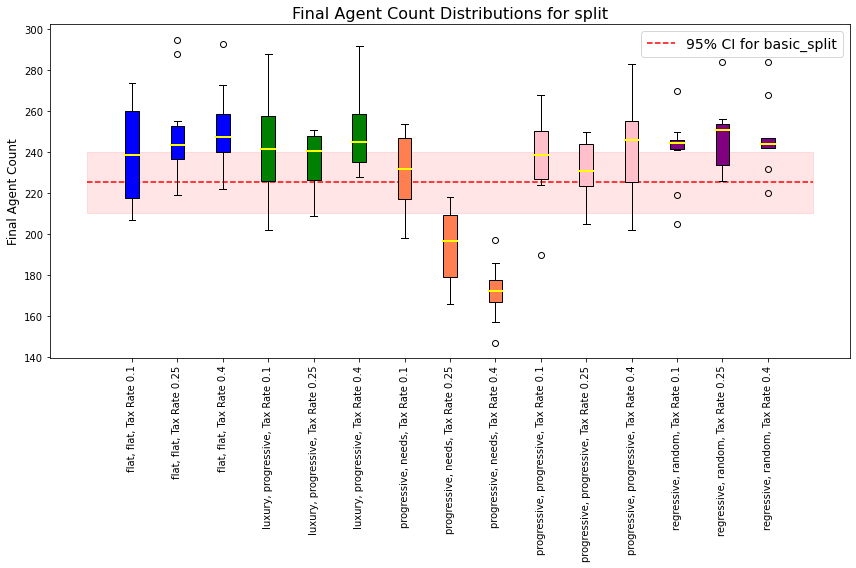

Best combination for split:
mean_agent    171.700000
std_agent      14.032106
Name: (progressive, needs, 0.4), dtype: float64
Kruskal-Wallis Test for top_heavy: H-statistic=10.314362909768974, p-value=0.7388577517499837
Significant Comparisons for top_heavy:
Empty DataFrame
Columns: []
Index: []


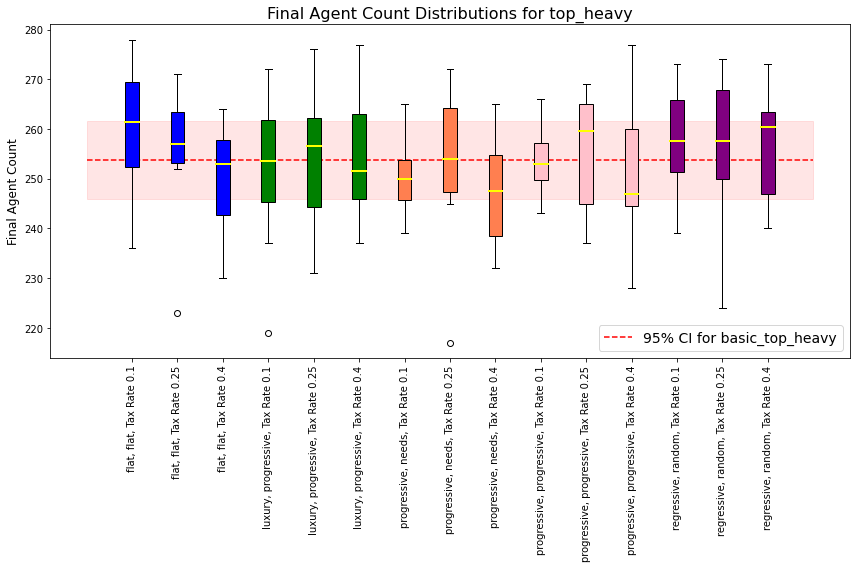

Best combination for top_heavy:
mean_agent    247.900000
std_agent      11.541712
Name: (progressive, needs, 0.4), dtype: float64
Kruskal-Wallis Test for uniform: H-statistic=29.488866060803378, p-value=0.008968166832438557
Significant Comparisons for uniform:
                      combination_1                    combination_2  \
0                 (flat, flat, 0.1)        (progressive, needs, 0.1)   
1                 (flat, flat, 0.1)       (progressive, needs, 0.25)   
2                 (flat, flat, 0.1)        (progressive, needs, 0.4)   
3                (flat, flat, 0.25)        (progressive, needs, 0.1)   
4                (flat, flat, 0.25)       (progressive, needs, 0.25)   
5                (flat, flat, 0.25)        (progressive, needs, 0.4)   
6                (flat, flat, 0.25)  (progressive, progressive, 0.4)   
7                 (flat, flat, 0.4)       (progressive, needs, 0.25)   
8                 (flat, flat, 0.4)        (progressive, needs, 0.4)   
9        (luxury, p

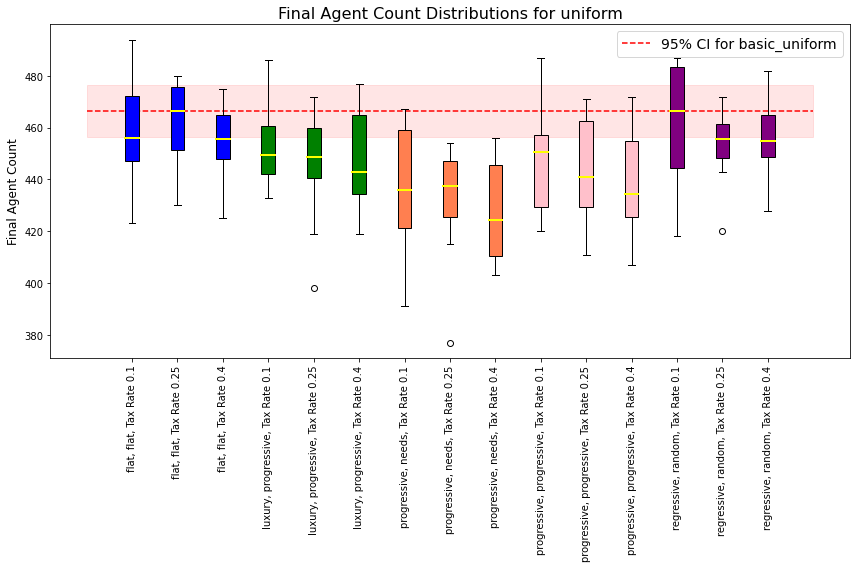

Best combination for uniform:
mean_agent    428.300000
std_agent      20.066833
Name: (progressive, needs, 0.4), dtype: float64


In [25]:
import logging
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kruskal, mannwhitneyu
from tqdm import tqdm
from multiprocessing import Pool, cpu_count
from src.SugarScape import SugarScape

def setup_logger():
    """Set up a logger for simulation."""
    logger = logging.getLogger("simulation")
    handler = logging.FileHandler("simulation.log")
    formatter = logging.Formatter('%(asctime)s - %(levelname)s - %(message)s')
    handler.setFormatter(formatter)
    logger.addHandler(handler)
    logger.setLevel(logging.INFO)
    return logger

def load_and_process(file_path):
    """Load CSV file and process the data."""
    data = pd.read_csv(file_path)
    
    def convert_str_to_list(list_str):
        list_str = list_str.strip('[]')
        list_str = list_str.split(',')
        return [float(x.strip()) for x in list_str]

    # Apply the conversion to the relevant columns
    data['Agents Over Time'] = data['Agents Over Time'].apply(convert_str_to_list)
    
    return data

def calculate_ci(data, confidence=0.95):
    """Calculate the 95% confidence interval for the final agent count."""
    n = len(data)
    mean = np.mean(data)
    sem = np.std(data) / np.sqrt(n)
    h = sem * 1.96  # 95% confidence interval
    return mean - h, mean + h

def summarize_significant_results(results):
    """Summarize significant comparisons with p-values."""
    significant_results = [res for res in results if res['p_value'] < 0.05]
    summary = pd.DataFrame(significant_results)
    return summary

def visualize_agent_distributions(data, title, ci):
    """Visualize agent count distributions using box plots and add CI lines."""
    fig, ax = plt.subplots(figsize=(12, 8))
    data_to_plot = []
    labels = []
    colors = ['blue', 'green', 'coral', 'pink', 'purple']  # Define colors for the groups

    for i, ((tax_scheme, distributer_scheme, tax_rate), group_data) in enumerate(data.groupby(['Tax Scheme', 'Distributer Scheme', 'Tax Rate'])):
        final_agent_count = [agents[-1] for agents in group_data['Agents Over Time']]
        data_to_plot.append(final_agent_count)
        labels.append(f"{tax_scheme}, {distributer_scheme}, Tax Rate {tax_rate}")

    boxprops = dict(color='blue')
    whiskerprops = dict(color='blue')
    capprops = dict(color='blue')
    medianprops = dict(color='yellow', linewidth=2)  # Change the median line to yellow and make it thicker
    
    for i in range(0, len(data_to_plot), 3):
        ax.boxplot(data_to_plot[i:i+3], positions=range(i+1, i+4), patch_artist=True, 
                   boxprops=dict(facecolor=colors[i//3 % len(colors)]),
                   medianprops=medianprops)  # Apply the yellow color for the median line
    
    ax.set_xticklabels(labels, rotation=90, fontsize=10)
    ax.set_ylabel('Final Agent Count', fontsize=12)
    ax.set_title(f'Final Agent Count Distributions for {title}', fontsize=16)
    
    # Add CI lines
    ax.hlines(y=ci['mean'], xmin=0, xmax=len(labels)+1, colors='red', linestyles='dashed', label=f"95% CI for {ci['model']}")
    ax.fill_between(x=np.arange(0, len(labels)+2), y1=ci['ci_lower'], y2=ci['ci_upper'], color='red', alpha=0.1)
    
    plt.legend(fontsize=14)
    plt.tight_layout()
    plt.show()

def identify_best_combination(data, title):
    """Identify the best combination for reducing agent count."""
    summary = data.groupby(['Tax Scheme', 'Distributer Scheme', 'Tax Rate']).agg(
        mean_agent=('Final Agent Count', 'mean'),
        std_agent=('Final Agent Count', 'std')
    ).sort_values(by='mean_agent')
    
    best_combination = summary.iloc[0]
    print(f"Best combination for {title}:")
    print(best_combination)

# Load data from the three files
file_paths = [
    'Experimental Results/experiments_results_v4_split.csv',
    'Experimental Results/experiments_results_v4_top_heavy.csv',
    'Experimental Results/experiments_results_v4_uniform.csv'
]

basic_model_paths = [
    'experiments_results_basic_split.csv',
    'experiments_results_basic_top_heavy.csv',
    'experiments_results_basic_uniform.csv'
]

titles = ['split', 'top_heavy', 'uniform']
all_data = [load_and_process(file_path) for file_path in file_paths]
basic_data = [load_and_process(file_path) for file_path in basic_model_paths]

# Calculate CI for basic models
ci_lines = {}
for data, title in zip(basic_data, titles):
    final_agent_count = [agents[-1] for agents in data['Agents Over Time']]
    ci_lower, ci_upper = calculate_ci(final_agent_count)
    ci_lines[title] = {'model': f'basic_{title}', 'mean': np.mean(final_agent_count), 'ci_lower': ci_lower, 'ci_upper': ci_upper}

# Perform analysis for each map
for data, title in zip(all_data, titles):
    # Get the final agent count for each run
    data['Final Agent Count'] = data['Agents Over Time'].apply(lambda x: x[-1])
    
    # Perform Kruskal-Wallis test
    group_data = [group['Final Agent Count'].values for name, group in data.groupby(['Tax Scheme', 'Distributer Scheme', 'Tax Rate'])]
    kruskal_result = kruskal(*group_data)
    print(f"Kruskal-Wallis Test for {title}: H-statistic={kruskal_result.statistic}, p-value={kruskal_result.pvalue}")
    
    # If significant, perform pairwise comparisons
    results = []
    if kruskal_result.pvalue < 0.05:
        combinations = data.groupby(['Tax Scheme', 'Distributer Scheme', 'Tax Rate']).groups.keys()
        combinations = list(combinations)
        for i in range(len(combinations)):
            for j in range(i+1, len(combinations)):
                group1 = data[(data['Tax Scheme'] == combinations[i][0]) & 
                              (data['Distributer Scheme'] == combinations[i][1]) & 
                              (data['Tax Rate'] == combinations[i][2])]['Final Agent Count'].values
                group2 = data[(data['Tax Scheme'] == combinations[j][0]) & 
                              (data['Distributer Scheme'] == combinations[j][1]) & 
                              (data['Tax Rate'] == combinations[j][2])]['Final Agent Count'].values
                u_statistic, p_value = mannwhitneyu(group1, group2)
                results.append({
                    'combination_1': combinations[i],
                    'combination_2': combinations[j],
                    'u_statistic': u_statistic,
                    'p_value': p_value
                })

    # Summarize significant results
    summary = summarize_significant_results(results)
    print(f"Significant Comparisons for {title}:")
    print(summary)
    
    # Visualize agent count distributions
    visualize_agent_distributions(data, title, ci_lines[title])
    
    # Identify the best combination for reducing agent count
    identify_best_combination(data, title)


